In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

Now, I predicted using a variety of models on the complete unsampled data and reduced resampled data

I have created a dataframe for noting down the performance of all models for both reduced and complete data:

In [103]:
d1 = {'Model Name':['Gradient Boosting','AdaBoost','Random Forest','KNN','Gaussian NB','Bernoulli NB'],
     'TrAcc_C_U':[91.03,62.34,95.41,93.51,46.99,63.50],
     'TstAcc_C_U':[89.97,61.98,94.81,92.07,45.78,63.01],
     'TrTime_C_U(m)':[13090,5487,12302,400,12,10],
     'TrAcc_R_R':[89.22,44.92,93.50,91.74,45.34,57.20],
     'TstAcc_R_R':[88.17,43.28,92.80,90.98,45.01,57.71],
     'TrTime_R_R(m)':[5400,2527,1202,30,3,2]}
dataframe = pd.DataFrame(data = d1)
dataframe['TrTime_C_U(m)'] = (dataframe['TrTime_C_U(m)'])/60
dataframe['TrTime_R_R(m)'] = (dataframe['TrTime_R_R(m)'])/60
dataframe

,Model Name,TrAcc_C_U,TstAcc_C_U,TrTime_C_U(m),TrAcc_R_R,TstAcc_R_R,TrTime_R_R(m)
0,Gradient Boosting,91.03,89.97,218.166667,89.22,88.17,90.000000
1,AdaBoost,62.34,61.98,91.450000,44.92,43.28,42.116667
2,Random Forest,95.41,94.81,205.033333,93.50,92.80,20.033333
3,KNN,93.51,92.07,6.666667,91.74,90.98,0.500000
4,Gaussian NB,46.99,45.78,0.200000,45.34,45.01,0.050000
5,Bernoulli NB,63.50,63.01,0.166667,57.20,57.71,0.033333


Text(0.5, 1.0, 'Time Performance')

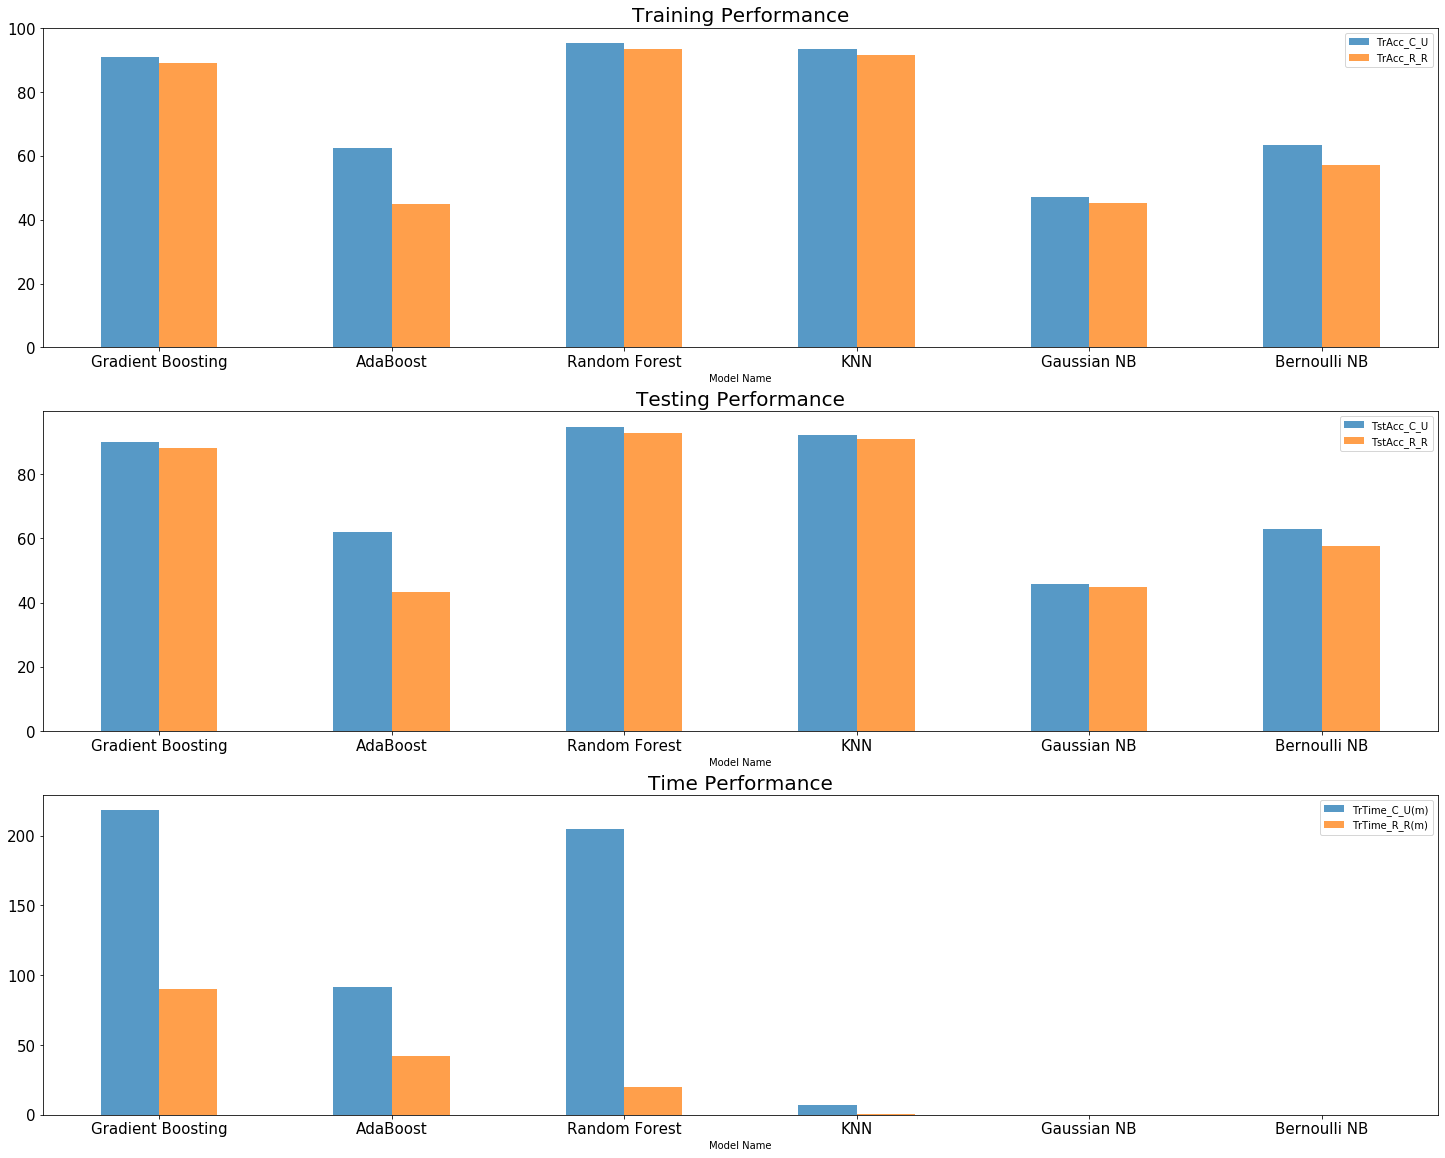

In [104]:
fig, ax = plt.subplots(nrows =3,ncols =1, figsize=(25,20))
ax = ax.flatten()
df_1 = dataframe[["Model Name","TrAcc_C_U",'TrAcc_R_R']]
df_1.set_index(["Model Name"],inplace=True)
df_1.plot(kind='bar',alpha=0.75, rot=0,ax = ax[0],fontsize=15)
ax[0].set_title('Training Performance', fontsize=20)
df_2 = dataframe[["Model Name","TstAcc_C_U",'TstAcc_R_R']]
df_2.set_index(["Model Name"],inplace=True)
df_2.plot(kind='bar',alpha=0.75, rot=0,ax = ax[1],fontsize=15)
ax[1].set_title('Testing Performance', fontsize=20)
df_3 = dataframe[["Model Name","TrTime_C_U(m)",'TrTime_R_R(m)']]
df_3.set_index(["Model Name"],inplace=True)
df_3.plot(kind='bar',alpha=0.75, rot=0,ax = ax[2],fontsize=15)
ax[2].set_title('Time Performance', fontsize=20)

### The following observations can be made from the above plots:

1.There is not much variation in training and testing performance of all models, irrespective of the type of data

2.The training time reduce significantly when the reduced data with resampled classes was used, for example in the third plot, training times for the models trained on reduced sample dataset are less than half for Gradient Boosting and Random Forest

## Comparing F1 scores for all classes across all models

In [166]:
F2 = {'row_name' : ['Ascomoid', 'Assassin vine', 'Basidirond', 'Myconid', 'Dark tree',
       'Hangman tree', 'Kelpie'],
    'KNN':[0.85,0.82,0.93,0.96,0.96,0.94,0.97],
     'RandomForest':[0.87,0.82,0.94,0.95,0.96,0.95,0.97],
     'Gradient Boosting':[0.81,0.78,0.87,0.97,0.94,0.88,0.97],
     'Gaussian NB':[0.85,0.09,0.61,0.79,0.53,0.22,0.59],
     'Bernoulli NB':[0.74,0.44,0.49,0.45,0.78,0.43,0.46],
     'Adaboost':[0.42,0.13,0.39,0.0,0.6,0.48,0.62]}
dataframe_F2 = pd.DataFrame(data = F2)

row_names = ['Ascomoid', 'Assassin vine', 'Basidirond', 'Myconid', 'Dark tree',
       'Hangman tree', 'Kelpie']
F1 = {'KNN':[0.85,0.82,0.93,0.96,0.96,0.94,0.97],
     'RandomForest':[0.87,0.82,0.94,0.95,0.96,0.95,0.97],
     'Gradient Boosting':[0.81,0.78,0.87,0.97,0.94,0.88,0.97],
     'Gaussian NB':[0.85,0.09,0.61,0.79,0.53,0.22,0.59],
     'Bernoulli NB':[0.74,0.44,0.49,0.45,0.78,0.43,0.46],
     'Adaboost':[0.42,0.13,0.39,0.0,0.6,0.48,0.62]}
dataframe_F1 = pd.DataFrame(data = F1,index =row_names)

In [151]:
dataframe_F1.row_name.to_list()

['Ascomoid',
 'Assassin vine',
 'Basidirond',
 'Myconid',
 'Dark tree',
 'Hangman tree',
 'Kelpie']

Text(0.5, 0, "['Ascomoid', 'Assassin vine', 'Basidirond', 'Myconid', 'Dark tree', 'Hangman tree', 'Kelpie']")

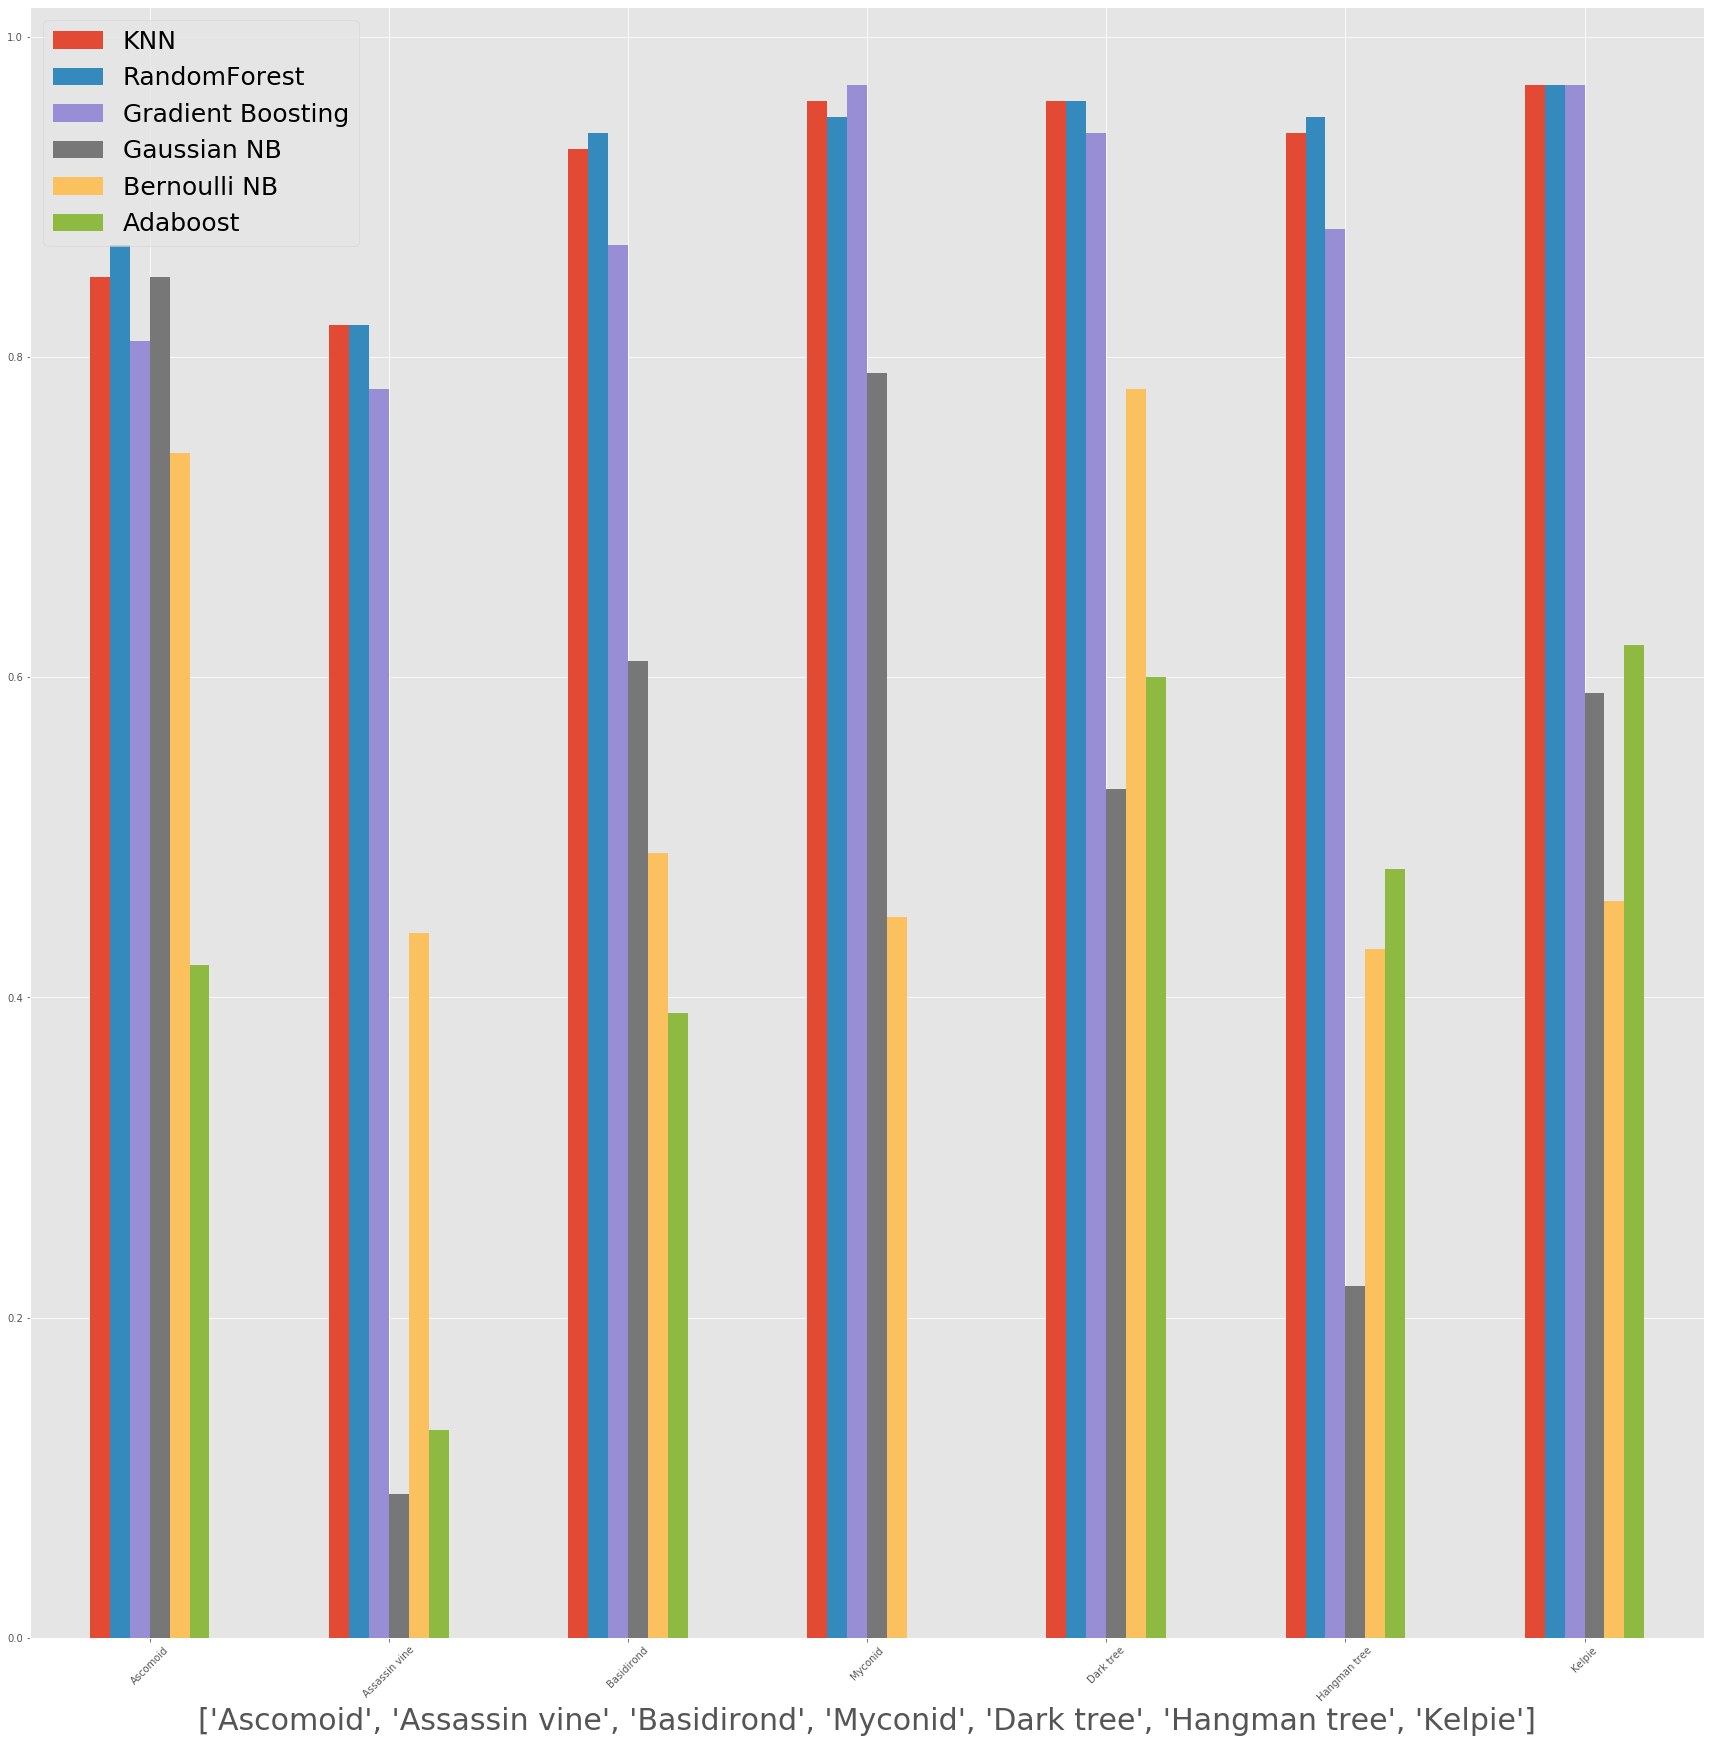

In [167]:
ax = dataframe_F2.plot.bar(x='row_name', rot=45,figsize=(30,30))
ax.legend(dataframe_F2.iloc[:,1:7].columns, fontsize=25)
ax.set_xlabel(dataframe_F2.row_name.to_list(),fontsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13205a278>,
      dtype=object)

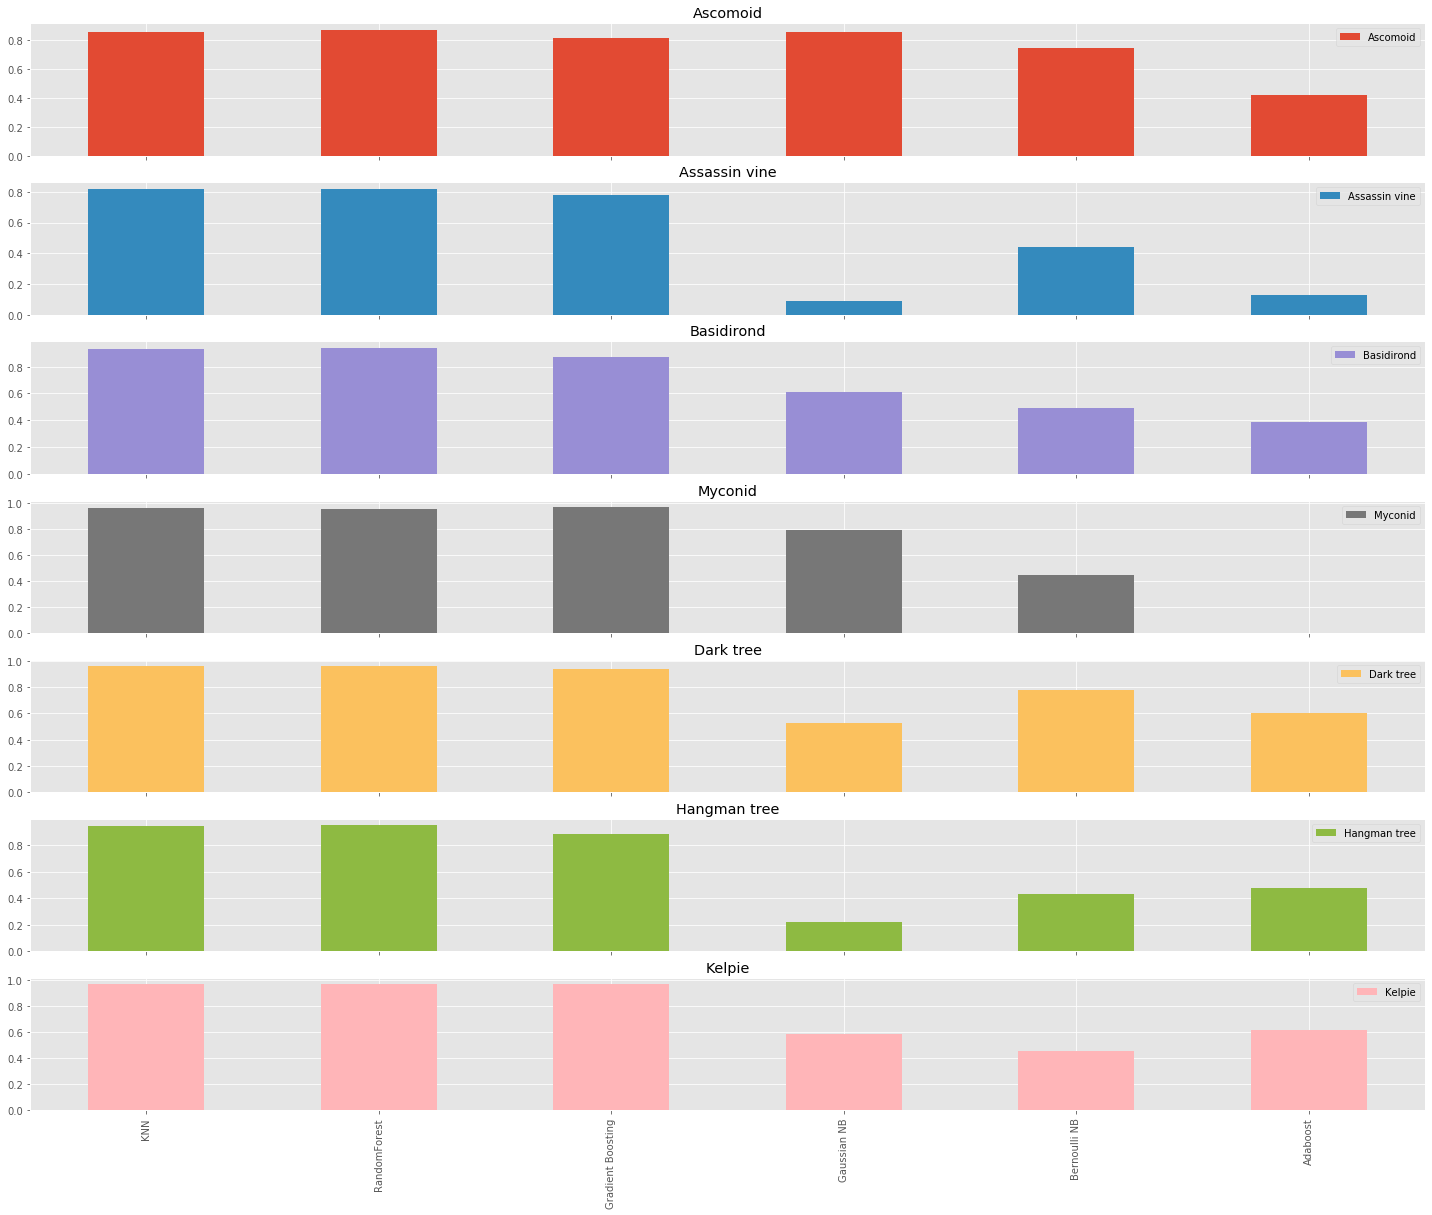

In [168]:
matplotlib.style.use('ggplot')
dataframe_F1.T.plot.bar(subplots=True,figsize=(25,20))

# Conclusion
From the observations made above, it seems reasonable to use the reduced resampled data to make predictions on this type of data, we will be saving up on a lot of computational time and CPU energy with a slight drop in accuracy
The Best model across all such models is KNN- it gives the best bang for the buck, be it accuracy/F1 scores and the training time is also significantly less